https://wikidocs.net/24654

#Count based word Representation


*   자연어를 머신러닝 등의 알고리즘이 이해할 수 있는 형태(함수의 입력값)로 수치화시키자.
*   문장 간 유사도 측정에 사용 가능.

  ### **국소표현(이산표현)**

  *   해당 단어 그 자체만 보고 특정값을 맵핑해 단어를 표현
  *   Bag of words, One-hot vector, N-gram(2장)

  ### **분산표현(연속표현)**

  *   그 단어를 표현하고자 주변을 참고해 단어를 표현. 문맥 고려 가능. 단어의 뉘앙스 반영
  *   Word2vec(10장), FastText(10장), LSA(6장)





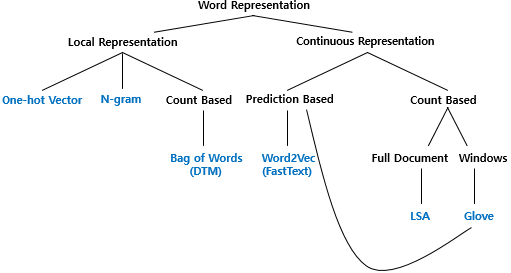

#Bag of Words(BoW)

*   단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 
*   BoW 만드는 과정
  *   각 단어에 고유한 정수 인덱스 부여
  *   각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 만듦








In [20]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 460kB 39.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [21]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식->온점 제거  
token=okt.morphs(token)  
# OKT 형태소 분석기(토큰화 작업)-> token에 넣기 

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으, word2index에 없는 어는 새로 추가하고, 이미 있는 단어는 넘   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1 넣음 (단어의 개수->최소 1개)
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옴
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하 인덱스의 위치에 1을 더함
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [22]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

불용어 제거한 BoW 만들기

In [29]:
!pip install nltk


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
# vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])  #직접 정의

# vect = CountVectorizer(stop_words="english")  #CountVectorizer 제공 자체 불용

sw = stopwords.words("english")               #NLTK 제공 불용어
vect = CountVectorizer(stop_words =sw)

print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

LookupError: ignored

#TF-IDF

- TF(Term Frequency, 단어 빈도): 특정 문서에서 특정 단어의 등장 횟수

- DF(Document Frequency, 문서 빈도): 특정 단어가 등장한 문서의 수

- IDF(Inverse Document Frequency, 역 문서 빈도)
  - idf(d,t)=log(n/(1+df(t)))
  - log-> IDF 가 기하급수적으로 커지는 것을 막아줌
  - 1-> 분모 0 방지


- TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.

In [31]:
import pandas as pd #데이터프레임 사용을 위해
from math import log #idf 계산을 위해

4개의 문서를 docs에 저장

In [32]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현

In [33]:
t ='hi'
doc='hi my name is jiwon'

df=0
df += t in doc

print(df)

1


In [34]:
N = len(docs) # 총 문서의 수
# t는 각 문서들에 포함된 단어
# d는 특정 문서
# df 문서빈도: 특정 단어 t가 등장한 문서
def tf(t, d):
    return d.count(t)

def idf(t):
    df=0
    for doc in docs:
      df+= t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

TF 구하기

In [35]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


각 단어에 대한 IDF 구하기

In [36]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


TF-IDF 행렬 출력

In [37]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# sklearn CountVectorizer을 이용한 DTM과 TF-IDF 실습

- fit을 사용하면 전체 문서에 대해 단어사전을 만듦

- transform은 단어사전에 기반해 문서-단어 행렬을 만듦.

- 띄어쓰기 기준이므로 한국어 문장은 적용 어려움('물가상승률과', '물가상승률은' 을 다르게 봄)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
vector.fit(corpus)                        #단어사전 생성
print(vector.get_feature_names())

vector.transform(corpus)                  #문서-단어 행렬(희소행렬)
print(vector.transform(corpus).toarray()) #문서-단어 행렬(numpy 배열)

pd.DataFrame(vector.transform(corpus).toarray(), columns=vector.get_feature_names())

['do', 'know', 'like', 'love', 'should', 'want', 'what', 'you', 'your']
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]


,do,know,like,love,should,want,what,you,your
0,0,1,0,1,0,1,0,1,1
1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0


# sklearn TfidfVectorizer 이용

사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공.

- 보편적인 TF-IDF 식에서 좀 더 조정된 다른 식 사용.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
